- Authors: Ravi Shankar Sankara Narayanan, Haritha Selvakumara, Vishaq Jayakumar
- Date: April 20, 2024
- File name: Data_extraction_analysis.ipynb
- Purpose: The porpose of this file is to convert the dataset to a suitable format that can used for analysis and for training the model

## Importing the libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import os
import csv
import cv2


import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


## Extract the video paths and labels

In [ ]:
# Define the base directory and labels directory
base_dir = '../data/DCSASS_Dataset/DCSASS_Dataset/'  # Replace with your base directory
labels_dir = '../data/DCSASS_Dataset/DCSASS_Dataset/Labels/'  # Replace with your labels directory

# Get the categories
categories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d)) and d != 'Labels']

# Define the path to the output CSV file
csv_output_path = './video_paths_and_labels.csv'

# Open the output CSV file
with open(csv_output_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(['video_path', 'label'])
    
    # Iterate over the categories
    for category in categories:
        category_path = os.path.join(base_dir, category)
        csv_file_path = os.path.join(labels_dir, f'{category}.csv')
        
        labels_df = pd.read_csv(csv_file_path)
        
        # Iterate over the video folders
        for video_folder in os.listdir(category_path):
            video_folder_path = os.path.join(category_path, video_folder)
            
            if not os.path.isdir(video_folder_path):
                continue
            
            # Iterate over the video files
            for video_file in os.listdir(video_folder_path):
                video_path = os.path.join(video_folder_path, video_file)
                
                video_base_name = os.path.splitext(video_file)[0]
                
                label_row = labels_df[labels_df.iloc[:, 0].str.match(video_base_name)]
    
                if not label_row.empty:
                    label = category if label_row.iloc[0,2] == 1 else 'Normal'
                    
                    video_path = video_path.replace('\\', '/')
                    # Write the video path and label to the CSV file
                    writer.writerow([video_path, label])

## Extract the image form video and then the image paths and their lables

In [ ]:
# Define the output directory for the frames
frames_dir = '../data/frames'  # Replace with your frames directory
os.makedirs(frames_dir, exist_ok=True)

# Define the path to the input CSV file and the output CSV file
csv_input_path = './video_paths_and_labels.csv'
csv_output_path = './image_paths_and_labels.csv'

# Read the input CSV file
print("Reading input CSV file...")
df = pd.read_csv(csv_input_path)
print("Input CSV file read.")

# Open the output CSV file
print("Opening output CSV file...")
with open(csv_output_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    
    # Write the header row
    writer.writerow(['image_path', 'label'])
    print("Header row written.")
    
    # Iterate over the rows in the DataFrame
    for index, row in df.iterrows():
        video_path = row['video_path']
        label = row['label']
        
        # Open the video file
        print(f"Opening video file {video_path}...")
        cap = cv2.VideoCapture(video_path)
        
        # Initialize the frame number
        frame_num = 0
        
        while(cap.isOpened()):
            # Read the next frame
            ret, frame = cap.read()
            
            if ret == False:
                break
            
            # Define the output image path
            video_base_name = os.path.splitext(os.path.basename(video_path))[0]
            image_path = os.path.join(frames_dir, f'{video_base_name}_{frame_num}.jpg')
            
            # Save the frame as an image
            cv2.imwrite(image_path, frame)
            #print(f"Saved frame {frame_num} as {image_path}.")
            

            image_path = image_path.replace('\\', '/')
            # Write the image path and label to the CSV file
            writer.writerow([image_path, label])
            #print(f"Wrote {image_path}, {label} to CSV file.")
            
            # Increment the frame number
            frame_num += 1
        
        # Release the video file
        cap.release()
        print(f"Released video file {video_path}.")

print("Finished processing all videos.")

## Data analysis

In [2]:
#Read the data for analysis
df = pd.read_csv('./image_paths_and_labels.csv')

In [3]:
print('The shape of the data is:', df.shape)

The shape of the data is: (1018500, 2)


The dimensions of the data are: (1018500, 2) which means we have almost 1 million images to work with. 

The percentage of each class is:
label
Normal           56.19
Robbery          10.84
Stealing          7.30
Burglary          5.68
Abuse             5.19
Arrest            3.07
Vandalism         2.34
Arson             1.96
RoadAccidents     1.78
Shooting          1.77
Assault           1.53
Shoplifting       0.98
Explosion         0.87
Fighting          0.50
Name: count, dtype: float64


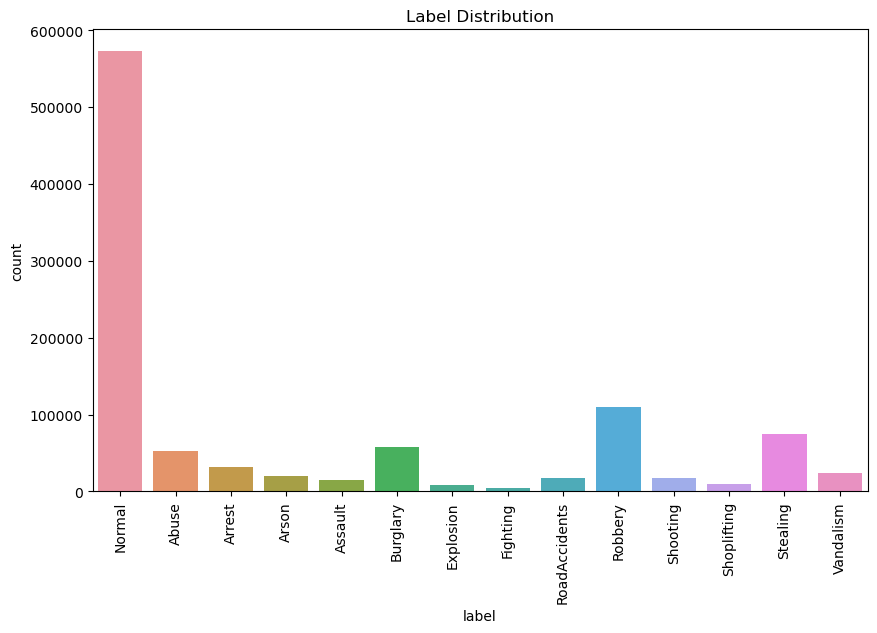

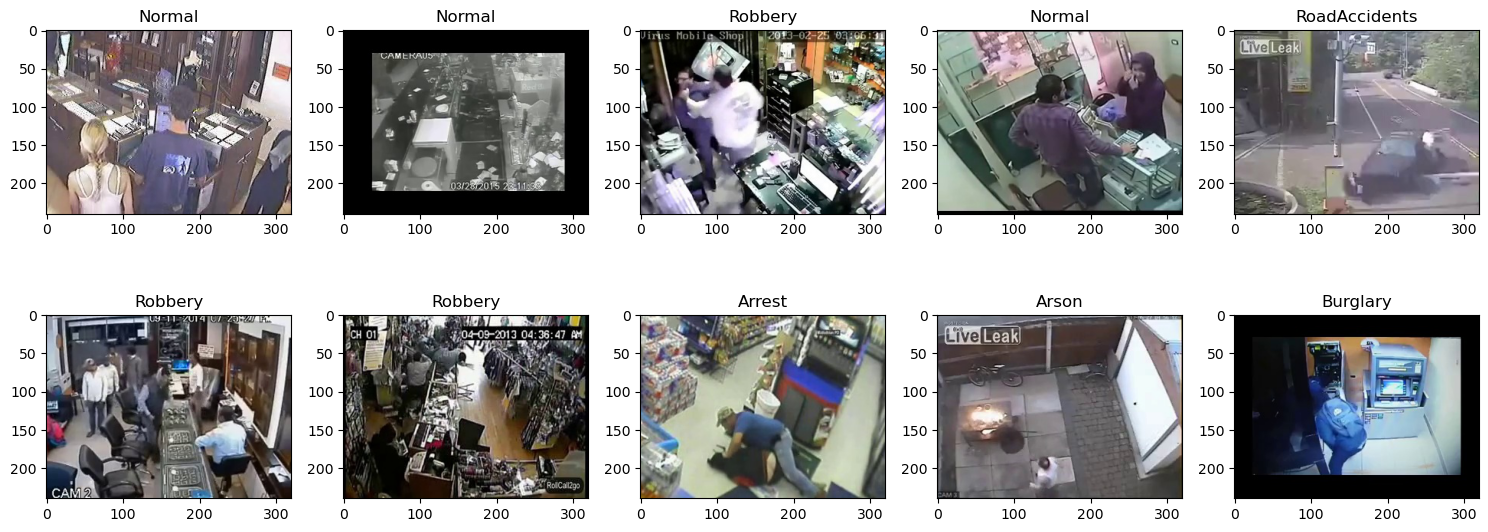

In [4]:
print('The percentage of each class is:')
print((df['label'].value_counts() / df.shape[0] * 100).round(2))


# Plot the label distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label')
plt.title('Label Distribution')
plt.xticks(rotation='vertical')  # Rotate x-tick labels to vertical
plt.show()

# Plot some images with their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Get 10 random rows from the dataframe
random_rows = df.sample(n=10, random_state=np.random.randint(100))

for i, ax in enumerate(axes.flat):
    # Get the image path and label from the random rows
    image_path = random_rows.iloc[i]['image_path']
    label = random_rows.iloc[i]['label']
    
    # Open and display the image
    image = Image.open(image_path)
    ax.imshow(image)
    ax.set_title(label)

plt.tight_layout()
plt.show()

From the label distribution we can obeserve that almost half the dataset has no anomalies. The images plotted below it along with the labels shows us that the data extraction is successful.